In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [ ]:
dataDf = pd.read_csv('calories.csv')
X = dataDf.drop(['Calories', 'User_ID'], axis=1)
y = dataDf['Calories']
features = ['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate']
num_col = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate']
cat_col = ['Gender']
numerical_features = X[num_col]
categorical_features = X[cat_col]

In [ ]:
# X['weight_squared'] = X['Weight'] ** 2
# X['heart_rate_weight_ratio'] = X['Heart_Rate'] / X['Weight']
# X['body_temp_age_ratio'] = X['Body_Temp'] / X['Age']
# X['exp_heart_rate'] = np.exp(X['Heart_Rate'])

X['weight_heart_rate'] = X['Weight'] * X['Heart_Rate']
X['heart_rate_weight_ratio'] = X['Heart_Rate'] / X['Weight']

X['duration_heart_rate'] = X['Duration'] * X['Heart_Rate']
X['age_body_temp'] = X['Age'] * X['Body_Temp']

X['heart_rate_squared'] = X['Heart_Rate'] ** 2

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(X[['Heart_Rate', 'Duration']])
poly_feature_names = poly.get_feature_names_out(['Heart_Rate', 'Duration'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
X = pd.concat([X, poly_df.iloc[:, 3:]], axis=1)

X['BMI'] = X['Weight'] / (X['Height'] ** 2)

X['work_done'] = X['Weight'] * (X['Duration'] * X['Heart_Rate'])


In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_col] = cat_imputer.fit_transform(X[cat_col])
num_col = X.select_dtypes(include=np.number).columns
num_imputer = SimpleImputer(strategy='mean')
X[num_col] = num_imputer.fit_transform(X[num_col])
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])
encoder = LabelEncoder()
X['Gender'] = encoder.fit_transform(X['Gender'])


In [3]:
import pandas as pd
# X.to_csv('data_X.csv', index=False)
# y.to_csv('data_y.csv', index=False)
X = pd.read_csv('data_X.csv')
y = pd.read_csv('data_y.csv')
features_used = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Gender']

In [3]:
# previous features
features_used = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Gender']
X_train, X_test, y_train, y_test = train_test_split(X[features_used], y, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)

importances = rf_regressor.feature_importances_
print("Feature Importances:", importances)


Mean Squared Error (MSE): 8.43193168888889
Mean Absolute Error (MAE): 1.8130888888888888
Root Mean Squared Error: 2.903778863634228
R-squared (R2 Score): 0.9978639331861516
Feature Importances: [2.61231702e-02 1.26901305e-03 2.98904719e-03 9.14648042e-01
 4.78705417e-02 5.23401456e-04 6.57678487e-03]


In [ ]:
# all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)

importances = rf_regressor.feature_importances_
print("Feature Importances:", importances)


Mean Squared Error (MSE): 8.11022517777778
Mean Absolute Error (MAE): 1.7396688888888885
Root Mean Squared Error: 2.8478457082113455
R-squared (R2 Score): 0.9979454313087097
Feature Importances: [5.25028048e-03 3.11864554e-03 3.03741977e-04 2.39245870e-04
 4.83881285e-05 2.90751908e-03 2.13307590e-04 2.77105847e-03
 7.24936363e-04 5.00126841e-01 2.25698409e-02 2.92950779e-03
 4.55303672e-01 5.61011409e-05 4.37878940e-04 2.99903539e-03]


In [7]:
# previous features
X_train, X_test, y_train, y_test = train_test_split(X[features_used], y, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)


Mean Squared Error (MSE): 38.31476295405596
Mean Absolute Error (MAE): 2.571783566497114
Root Mean Squared Error: 6.189891998577678
R-squared (R2 Score): 0.9902936958402455


In [8]:
# all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)


Mean Squared Error (MSE): 35.609317732420266
Mean Absolute Error (MAE): 2.4838805176244394
Root Mean Squared Error: 5.967354332735762
R-squared (R2 Score): 0.9909790680619199


In [9]:
# previous features
X_train, X_test, y_train, y_test = train_test_split(X[features_used], y, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42)
mlp_regressor.fit(X_train, y_train)
y_pred = mlp_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)


Mean Squared Error (MSE): 0.23509714242376725
Mean Absolute Error (MAE): 0.3693134020476239
Root Mean Squared Error: 0.48486817014913164
R-squared (R2 Score): 0.9999404426859122


Mean Squared Error (MSE): 0.20244515879883213
Mean Absolute Error (MAE): 0.35201822201037924
Root Mean Squared Error: 0.4499390612058839
R-squared (R2 Score): 0.9999487144344511


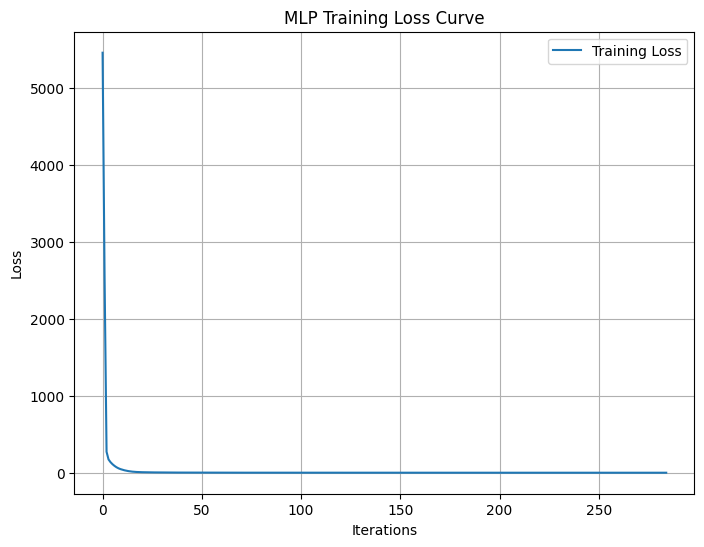

In [3]:
# all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42)
mlp_regressor.fit(X_train, y_train)
y_pred = mlp_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)

plt.figure(figsize=(8, 6))
plt.plot(mlp_regressor.loss_curve_, label='Training Loss')
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)


Mean Squared Error (MSE): 24.086
Mean Absolute Error (MAE): 3.1655555555555557
Root Mean Squared Error: 4.907748974835612
R-squared (R2 Score): 0.9938982777403012


In [16]:
# previous features
X_train, X_test, y_train, y_test = train_test_split(X[features_used], y, test_size=0.3, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)


Mean Squared Error (MSE): 29.534
Mean Absolute Error (MAE): 3.4797777777777776
Root Mean Squared Error: 5.434519297969232
R-squared (R2 Score): 0.9925181323084803


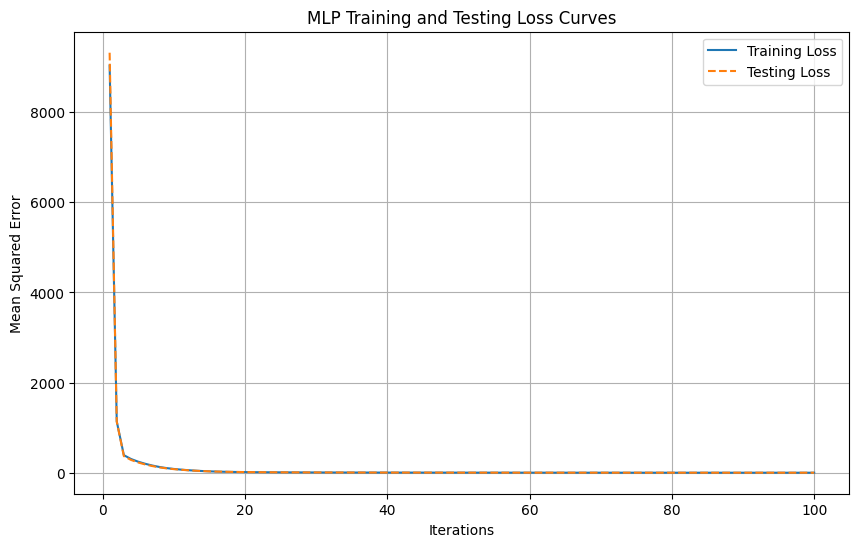

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# If y is a DataFrame, convert it to a numpy array and flatten it
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Initialize the MLP Regressor with `warm_start=True` to allow partial fitting
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=1,  # One iteration per fit call
    warm_start=True,  # Allow partial fitting for iterative training
    random_state=42
)

# Track losses
training_loss = []
testing_loss = []

# Train the model for a set number of iterations and track losses
n_iterations = 100
for iteration in range(n_iterations):
    mlp_regressor.partial_fit(X_train, y_train)  # Train for one iteration
    train_pred = mlp_regressor.predict(X_train)
    test_pred = mlp_regressor.predict(X_test)
    
    # Compute training and testing loss
    training_loss.append(mean_squared_error(y_train, train_pred))
    testing_loss.append(mean_squared_error(y_test, test_pred))

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), training_loss, label='Training Loss')
plt.plot(range(1, n_iterations + 1), testing_loss, label='Testing Loss', linestyle='--')
plt.title('MLP Training and Testing Loss Curves')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()


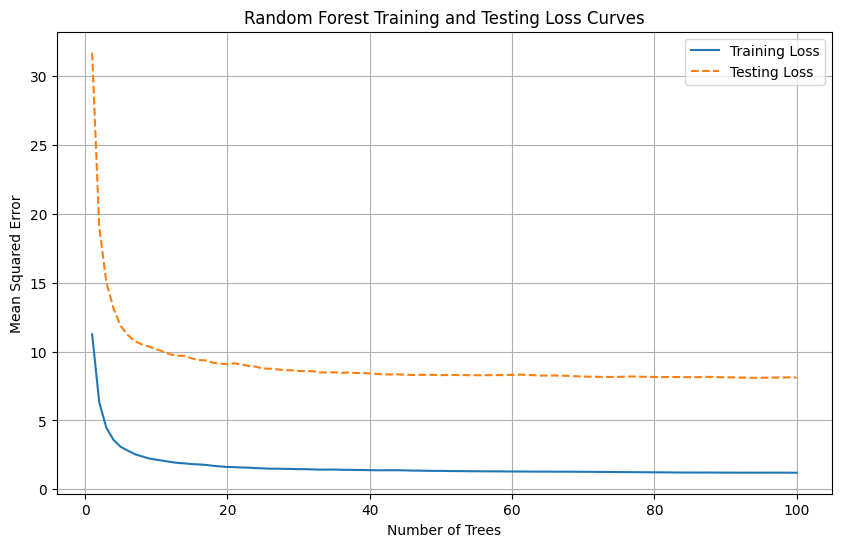

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# If y is a DataFrame, convert it to a numpy array and flatten it
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create the RandomForest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,  # Total number of trees
    warm_start=True,   # Allow incremental training
    random_state=42
)

# Initialize lists to track training and testing loss
training_loss = []
testing_loss = []

# Train the model incrementally and track losses
for n_trees in range(1, 101):  # Incrementally add trees to the forest
    rf_regressor.set_params(n_estimators=n_trees)  # Update the number of trees
    rf_regressor.fit(X_train, y_train)  # Fit the model
    
    # Compute predictions
    train_pred = rf_regressor.predict(X_train)
    test_pred = rf_regressor.predict(X_test)
    
    # Compute and store losses
    training_loss.append(mean_squared_error(y_train, train_pred))
    testing_loss.append(mean_squared_error(y_test, test_pred))

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), training_loss, label='Training Loss')
plt.plot(range(1, 101), testing_loss, label='Testing Loss', linestyle='--')
plt.title('Random Forest Training and Testing Loss Curves')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()
